## User Behavioral Analytics on Videos Dataset

In [491]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [492]:
#Reading Data from csv
dataset= pd.read_csv('cdnelastic_VoD.csv')

In [493]:
dataset

,coordinates,timetoserv,uafamily,sid,contenttype,statuscode,uid,protocol,hit,@timestamp,contentpackage,host,assetnumber,livechannel,contentlength
0,1.0,0.022135,16.0,3871,video/mp4,200,NaN,HTTP/1.1,miss,2088-05-13T09:20:46.000Z,55.0,15,54.0,NaN,33963.682540
1,1.0,0.000248,16.0,3323,video/mp4,200,NaN,HTTP/1.1,hit,2088-05-13T09:20:55.000Z,55.0,15,54.0,NaN,518.730159
2,1.0,0.000221,16.0,3930,video/mp4,200,NaN,HTTP/1.1,hit,2088-05-13T09:23:34.000Z,59.0,15,58.0,NaN,512.809524
3,1.0,0.001468,16.0,3945,video/mp4,200,NaN,HTTP/1.1,hit,2088-05-13T09:23:34.000Z,59.0,15,58.0,NaN,7758.412698
4,1.0,0.000265,16.0,3739,video/mp4,200,NaN,HTTP/1.1,hit,2088-05-13T09:23:36.000Z,59.0,15,58.0,NaN,518.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696289,0.0,0.010339,12.0,1280459,video/mpeg,206,NaN,HTTP/1.1,miss,2088-05-19T05:49:45.000Z,3938.0,4,3472.0,NaN,1543.206349
3696290,4823.0,0.000293,12.0,1280455,video/mpeg,206,NaN,HTTP/1.1,hit,2088-05-19T05:51:33.000Z,2829.0,4,2553.0,NaN,1579.206349
3696291,1792.0,0.000358,16.0,1281366,video/mp4,200,NaN,HTTP/1.1,hit,2088-05-19T06:52:35.000Z,3821.0,15,2357.0,NaN,4768.746032
3696292,0.0,0.000317,12.0,1281441,video/mpeg,206,NaN,HTTP/1.1,hit,2088-05-19T06:57:49.000Z,2753.0,4,2501.0,NaN,1541.666667


After the data was loaded, We look at what columns we have and their types.

In [494]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696294 entries, 0 to 3696293
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   coordinates     float64
 1   timetoserv      float64
 2   uafamily        float64
 3   sid             int64  
 4   contenttype     object 
 5   statuscode      int64  
 6   uid             float64
 7   protocol        object 
 8   hit             object 
 9   @timestamp      object 
 10  contentpackage  float64
 11  host            int64  
 12  assetnumber     float64
 13  livechannel     float64
 14  contentlength   float64
dtypes: float64(8), int64(3), object(4)
memory usage: 423.0+ MB


In [495]:
dataset.isna().sum()

coordinates           550
timetoserv              0
uafamily           731034
sid                     0
contenttype             0
statuscode              0
uid               3426337
protocol                0
hit                     0
@timestamp              0
contentpackage          0
host                    0
assetnumber             0
livechannel       3696294
contentlength           0
dtype: int64

My focus will be mainly on SID, uid, contentpackage, for uid, I have many NaN values, so I will drop them to have a better view of the data, I will also be dropping rows with statuscode 404, 503.

In [496]:
dataset = dataset.dropna(subset=['uid'])

In [497]:
dataset['statuscode'].value_counts()

200    154751
206    115198
503         8
Name: statuscode, dtype: int64

In [498]:
dataset = dataset[dataset['statuscode'] != 404]
dataset = dataset[dataset['statuscode'] != 503]

In [499]:
dataset.isna().sum()

coordinates           77
timetoserv             0
uafamily            2540
sid                    0
contenttype            0
statuscode             0
uid                    0
protocol               0
hit                    0
@timestamp             0
contentpackage         0
host                   0
assetnumber            0
livechannel       269949
contentlength          0
dtype: int64

I will be dropping the following columns as I see they will not be necessary for this project: timetoserv, uafamily, protocol, hit, host, livechannel.

In [500]:
columnsdrop = ['timetoserv', 'uafamily', 'protocol', 'hit', 'host', 'livechannel', 'assetnumber', 'coordinates', 'statuscode', 'contentlength']
dataset = dataset.drop(columnsdrop, axis=1)

In [501]:
dataset

,sid,contenttype,uid,@timestamp,contentpackage
53,3554,text/xml,884.0,2088-05-13T09:04:13.000Z,28.0
217,14165,video/mp4,2205.0,2088-05-13T15:10:05.000Z,180.0
232,12194,video/mp4,1954.0,2088-05-13T16:17:21.000Z,134.0
234,16585,video/mp4,2530.0,2088-05-13T16:24:14.000Z,199.0
236,16585,video/mp4,2530.0,2088-05-13T16:32:53.000Z,199.0
...,...,...,...,...,...
3696221,877705,video/mpeg,1234.0,2088-05-19T01:26:49.000Z,3193.0
3696223,877705,video/mp4,1234.0,2088-05-19T01:40:43.000Z,3193.0
3696226,16535,text/xml,23337.0,2088-05-19T01:57:54.000Z,172.0
3696264,883882,video/mp4,26905.0,2088-05-19T03:07:44.000Z,3713.0


In [502]:
dataset = dataset.reset_index(drop=True)

In [503]:
#changing name of contentpackage to contentID
dataset.rename(columns = {'contentpackage' : 'contentid'}, inplace=True)
dataset.rename(columns = {'@timestamp' : 'date'}, inplace=True)

In [504]:
# dataset['date'] = dataset['date'].astype('datetime64')

dataset['date']= pd.to_datetime(dataset['date']).dt.date
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269949 entries, 0 to 269948
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sid          269949 non-null  int64  
 1   contenttype  269949 non-null  object 
 2   uid          269949 non-null  float64
 3   date         269949 non-null  object 
 4   contentid    269949 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.3+ MB


Now, let us look at the data and get an idea after some basic cleaning

In [505]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269949 entries, 0 to 269948
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sid          269949 non-null  int64  
 1   contenttype  269949 non-null  object 
 2   uid          269949 non-null  float64
 3   date         269949 non-null  object 
 4   contentid    269949 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.3+ MB


In [506]:
dataset['uid'] = dataset['uid'].astype('Int64')
dataset['contentid'] = dataset['contentid'].astype('Int64')

In [507]:
dataset

,sid,contenttype,uid,date,contentid
0,3554,text/xml,884,2088-05-13,28
1,14165,video/mp4,2205,2088-05-13,180
2,12194,video/mp4,1954,2088-05-13,134
3,16585,video/mp4,2530,2088-05-13,199
4,16585,video/mp4,2530,2088-05-13,199
...,...,...,...,...,...
269944,877705,video/mpeg,1234,2088-05-19,3193
269945,877705,video/mp4,1234,2088-05-19,3193
269946,16535,text/xml,23337,2088-05-19,172
269947,883882,video/mp4,26905,2088-05-19,3713


I will now count how many user Ids we have, how many session Ids, and how many content IDs.

In [508]:
#UserID count
dataset['uid'].value_counts()
uidCount = len(dataset['uid'].value_counts())
print(uidCount)

3669


In [509]:
#SessionID count
dataset['sid'].value_counts()
sidCount = len(dataset['sid'].value_counts())
print(sidCount)

15337


In [510]:
#content id count
dataset['contentid'].value_counts()
sidCount = len(dataset['contentid'].value_counts())
print(sidCount)

3422


In [511]:
dataset['contenttype'].value_counts()

video/mp4               198254
video/mpeg               51330
text/xml                 19244
application/dash+xml      1018
application/ttaf+xml       103
Name: contenttype, dtype: int64

So in this dataset, we have activity of 3668 users, 15336 sessions, and 3422 content to be viewed.

Sorting the dataset based on the uid.

In [512]:
dataset=dataset.sort_values(by = 'uid')
dataset = dataset.reset_index(drop=True)


In [513]:
dataset

,sid,contenttype,uid,date,contentid
0,37,video/mp4,24,2088-05-16,3528
1,37,video/mp4,24,2088-05-16,3528
2,37,video/mp4,24,2088-05-16,3528
3,37,video/mp4,24,2088-05-16,3528
4,37,video/mp4,24,2088-05-16,3528
...,...,...,...,...,...
269944,1279903,text/xml,28729,2088-05-19,2829
269945,1279903,text/xml,28729,2088-05-19,2829
269946,1279903,text/xml,28729,2088-05-19,2829
269947,1279903,text/xml,28729,2088-05-19,2829


# Analyzing the data #

## Number of pages per session ##

I will create a table that shows the number of pages per session first.

In [514]:
df1 = dataset.groupby(['sid'])['sid'].count().reset_index(name="count")
print(df1)

           sid  count
0           37     78
1          412      1
2          464      1
3          649      1
4          698    116
...        ...    ...
15332  1281224      1
15333  1281415      1
15334  1281439      1
15335  1281464      1
15336  1281469      1

[15337 rows x 2 columns]


In [515]:
df1["count"].describe()

count    15337.000000
mean        17.601161
std        335.934060
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      25807.000000
Name: count, dtype: float64

## Top 20 content ##

In [516]:
df2 = dataset.groupby(['contentid'])['contentid'].count().sort_values(ascending=False).reset_index(name="hits").head(20)
print(df2)

    contentid   hits
0        2742  10360
1        3276   8672
2         692   7647
3        1996   7461
4         571   6777
5        2829   6661
6        2960   6412
7        3244   5732
8        3259   5635
9        2196   5566
10       2886   5486
11        331   5387
12       1620   5219
13        163   5020
14       1778   4687
15       2835   4587
16        317   4569
17       2976   4294
18       1579   4119
19       1561   4047


# Feature Engineering #

I will be creating a LRFP table. 
L: Length feature
R: Recency feature
F: Frequency feature
P: Periodicity

## Length feature ##

Method: Find the days between first and last session per user. (last session date - first session date)

In [517]:
df_l = pd.DataFrame().assign(uid=dataset['uid'], lastsession=dataset['date'], firstsession=dataset['date'])

df_l = df_l.groupby('uid').agg({'lastsession':'max', 'firstsession':'min'})[['lastsession', 'firstsession']].reset_index()
df_l["length"] = (df_l["lastsession"] - df_l["firstsession"]).dt.days
print(df_l)

        uid lastsession firstsession  length
0        24  2088-05-16   2088-05-16       0
1        59  2088-05-15   2088-05-15       0
2       212  2088-05-14   2088-05-14       0
3       292  2088-05-15   2088-05-13       2
4       318  2088-05-16   2088-05-13       3
...     ...         ...          ...     ...
3664  28723  2088-05-19   2088-05-19       0
3665  28725  2088-05-19   2088-05-19       0
3666  28726  2088-05-19   2088-05-19       0
3667  28729  2088-05-19   2088-05-19       0
3668  28732  2088-05-19   2088-05-19       0

[3669 rows x 4 columns]


In [518]:
df_l.length.describe()

count    3669.000000
mean        0.587081
std         1.295011
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: length, dtype: float64

C:\Users\96279\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


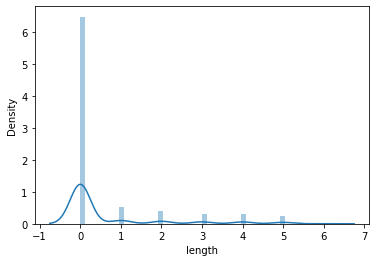

In [519]:
x = df_l['length']
ax = sns.distplot(x)

## Recency Feature ##

Recency will show the days since the last purchase. (I will consider 2088 to be the current year)

In [520]:
timeperiod = dataset['date'].max() - dataset['date'].min()
print (timeperiod)

6 days, 0:00:00


In [521]:
today = date(2088, 6, 9)
df_r = pd.DataFrame().assign(uid=df_l['uid'], lastsession=df_l['lastsession'])
df_r['recency'] = (today - df_l["lastsession"]).dt.days
df_r = df_r.drop(['lastsession'], axis=1)
df_r

,uid,recency
0,24,24
1,59,25
2,212,26
3,292,25
4,318,24
...,...,...
3664,28723,21
3665,28725,21
3666,28726,21
3667,28729,21


In [522]:
df_r.recency.describe()

count    3669.000000
mean       23.769692
std         1.673156
min        21.000000
25%        22.000000
50%        24.000000
75%        25.000000
max        27.000000
Name: recency, dtype: float64

C:\Users\96279\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


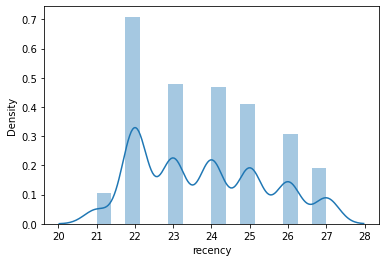

In [523]:
x = df_r['recency']
ax = sns.distplot(x)

## Frequency Feature ##

Frequency is the number of sessions per user.

In [524]:
df_f = dataset.groupby(['uid'])['sid'].nunique().reset_index(name="frequency")
print(df_f)

        uid  frequency
0        24          1
1        59          1
2       212          1
3       292         46
4       318         37
...     ...        ...
3664  28723          1
3665  28725          1
3666  28726          1
3667  28729          1
3668  28732          1

[3669 rows x 2 columns]


In [525]:
df_f.frequency.describe()

count    3669.000000
mean        4.300354
std        10.030692
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       212.000000
Name: frequency, dtype: float64

C:\Users\96279\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


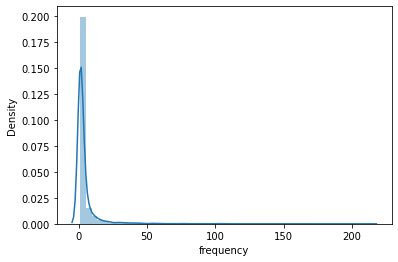

In [526]:
x = df_f['frequency']
ax = sns.distplot(x)

## Periodicity Features ##

Periodicity as the standard deviation of the intervall between two purchases

In [527]:
df_p = pd.DataFrame().assign(uid=dataset['uid'], date=dataset['date'])
df_p['date'] = df_p['date'].astype('datetime64')

ivtdiff = lambda x: abs(x.shift(1) - x)

df_p["periodicity"] = (df_p.groupby("uid")["date"].transform(ivtdiff)).dt.days
df_p = df_p.drop(['date'], axis=1)
df_p = df_p.groupby(["uid"])["periodicity"].mean().reset_index(name="periodicity")
df_p


,uid,periodicity
0,24,0.000000
1,59,NaN
2,212,0.000000
3,292,0.933333
4,318,0.916667
...,...,...
3664,28723,NaN
3665,28725,NaN
3666,28726,0.000000
3667,28729,0.000000


In [528]:
df_p.periodicity.describe()

count    2143.000000
mean        0.485885
std         0.826338
min         0.000000
25%         0.000000
50%         0.000000
75%         0.800000
max         5.000000
Name: periodicity, dtype: float64

C:\Users\96279\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


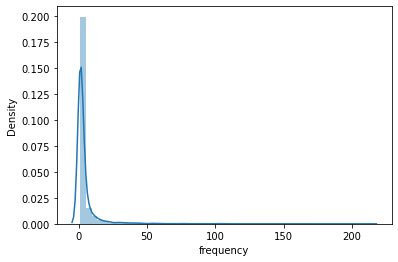

In [529]:
x = df_f['frequency']
ax = sns.distplot(x)

# Merging Features #

In [530]:
df_lrfp = pd.merge(df_l, df_r, on="uid")
df_lrfp = pd.merge(df_lrfp, df_f, on="uid")
df_lrfp = pd.merge(df_lrfp, df_p, on="uid")
df_lrfp = df_lrfp.drop(['firstsession', 'lastsession'], axis=1)

df_lrfp

,uid,length,recency,frequency,periodicity
0,24,0,24,1,0.000000
1,59,0,25,1,NaN
2,212,0,26,1,0.000000
3,292,2,25,46,0.933333
4,318,3,24,37,0.916667
...,...,...,...,...,...
3664,28723,0,21,1,NaN
3665,28725,0,21,1,NaN
3666,28726,0,21,1,0.000000
3667,28729,0,21,1,0.000000


In [531]:
# alot of NaN values in periodicity

pd.isna(df_lrfp["periodicity"])

p_mean = df_lrfp["periodicity"].mean()

df_lrfp["periodicity"].fillna(value=p_mean, inplace=True)

print(df_lrfp)

        uid  length  recency  frequency  periodicity
0        24       0       24          1     0.000000
1        59       0       25          1     0.485885
2       212       0       26          1     0.000000
3       292       2       25         46     0.933333
4       318       3       24         37     0.916667
...     ...     ...      ...        ...          ...
3664  28723       0       21          1     0.485885
3665  28725       0       21          1     0.485885
3666  28726       0       21          1     0.000000
3667  28729       0       21          1     0.000000
3668  28732       0       21          1     0.485885

[3669 rows x 5 columns]


## Removing Outliers ##

In [532]:
for x in ['recency']:
    q75,q25 = np.percentile(df_lrfp.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_lrfp.loc[df_lrfp[x] < min,x] = np.nan
    df_lrfp.loc[df_lrfp[x] > max,x] = np.nan

In [533]:
for x in ['frequency']:
    q75,q25 = np.percentile(df_lrfp.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_lrfp.loc[df_lrfp[x] < min,x] = np.nan
    df_lrfp.loc[df_lrfp[x] > max,x] = np.nan

In [534]:
for x in ['periodicity']:
    q75,q25 = np.percentile(df_lrfp.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_lrfp.loc[df_lrfp[x] < min,x] = np.nan
    df_lrfp.loc[df_lrfp[x] > max,x] = np.nan

In [535]:
df_lrfp=df_lrfp.dropna()

Now we split the metrics into segments using quantiles.We assign a score from 1 to 4 to Length, Recency, Frequency and periodicity. One is the best/highest value, and four is the lowest/worst value. A final LRFP score is calculated simply by combining individual LRFP score numbers.

In [536]:
quantiles = df_lrfp.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [537]:
segmented_lrfp = df_lrfp.copy()

In [538]:
# for L and R and periodicity, the lowest the value the better it is, it means the customer is more engaged
def LRPScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
  # the higher the frequency, the better it is  
def FScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [539]:
segmented_lrfp['L_quartile'] = segmented_lrfp['length'].apply(LRPScore, args=('length',quantiles))
segmented_lrfp['R_quartile'] = segmented_lrfp['recency'].apply(LRPScore, args=('recency',quantiles))
segmented_lrfp['F_quartile'] = segmented_lrfp['frequency'].apply(LRPScore, args=('frequency',quantiles))
segmented_lrfp['P_quartile'] = segmented_lrfp['periodicity'].apply(FScore, args=('periodicity',quantiles))
segmented_lrfp.head()

,uid,length,recency,frequency,periodicity,L_quartile,R_quartile,F_quartile,P_quartile
0,24,0,24.0,1.0,0.000000,1,2,1,4
1,59,0,25.0,1.0,0.485885,1,3,1,3
2,212,0,26.0,1.0,0.000000,1,4,1,4
5,323,0,25.0,1.0,0.485885,1,3,1,3
7,356,0,27.0,1.0,0.000000,1,4,1,4


Best Length Score = 1: Best length of history a user spent on this website. Best Recency score = 1: watched very recently. Best Frequency score = 1: highest quantity sessions. Best periodicity score = 1: most consistent in using the website. 

In [540]:
segmented_lrfp['LRFP_Segment'] = segmented_lrfp.L_quartile.map(str)+segmented_lrfp.R_quartile.map(str)+segmented_lrfp.F_quartile.map(str)+segmented_lrfp.P_quartile.map(str)
segmented_lrfp.head()

,uid,length,recency,frequency,periodicity,L_quartile,R_quartile,F_quartile,P_quartile,LRFP_Segment
0,24,0,24.0,1.0,0.000000,1,2,1,4,1214
1,59,0,25.0,1.0,0.485885,1,3,1,3,1313
2,212,0,26.0,1.0,0.000000,1,4,1,4,1414
5,323,0,25.0,1.0,0.485885,1,3,1,3,1313
7,356,0,27.0,1.0,0.000000,1,4,1,4,1414


In [541]:
segmented_lrfp['LRFP_Score'] = segmented_lrfp[['L_quartile','R_quartile','F_quartile','P_quartile']].sum(axis=1)
segmented_lrfp.head()

,uid,length,recency,frequency,periodicity,L_quartile,R_quartile,F_quartile,P_quartile,LRFP_Segment,LRFP_Score
0,24,0,24.0,1.0,0.000000,1,2,1,4,1214,8
1,59,0,25.0,1.0,0.485885,1,3,1,3,1313,8
2,212,0,26.0,1.0,0.000000,1,4,1,4,1414,10
5,323,0,25.0,1.0,0.485885,1,3,1,3,1313,8
7,356,0,27.0,1.0,0.000000,1,4,1,4,1414,10


In [542]:
print('Most Active Users: ',len(segmented_lrfp[segmented_lrfp['F_quartile']==1]))
print('Oldest Users: ',len(segmented_lrfp[segmented_lrfp['L_quartile']==1]))
print('Most likely to visit the site again : ',len(segmented_lrfp[segmented_lrfp['R_quartile']==1]))
print('Least Active Users: ',len(segmented_lrfp[segmented_lrfp['F_quartile']==4]))

Most Active Users:  1957
Oldest Users:  2722
Most likely to visit the site again :  797
Least Active Users:  541


In [543]:
segmented_lrfp['LRFP_Score'].unique()

array([ 8, 10,  9, 13,  7, 12, 15, 11,  6, 14], dtype=int64)

In [544]:
segmented_lrfp.groupby('LRFP_Score').agg({
    'length': 'mean',
    'recency': 'mean',
    'frequency': 'mean', 
    'periodicity' : 'mean'}).round(1)

,length,recency,frequency,periodicity
LRFP_Score,,,,
6,0.0,21.9,1.0,0.5
7,0.0,23.3,1.0,0.4
8,0.1,24.5,1.0,0.3
9,0.1,25.2,1.2,0.3
10,0.3,23.6,2.5,0.1
11,0.4,23.9,3.4,0.1
12,0.3,25.3,3.1,0.1
13,0.3,26.0,4.0,0.1
14,1.0,25.1,4.3,0.3


# K-Means Clustering #

For k-means to work well, the data distribution should not be skewed, and standarized (mean of 0 and std of 1). And as we saw from figures above, the data is highly skewed to the left.

In [545]:
scaled_df = pd.DataFrame().assign(uid=segmented_lrfp['uid'] ,length=segmented_lrfp['length'], frequency=segmented_lrfp['frequency'], recency=segmented_lrfp['recency'] ,periodicity=segmented_lrfp['periodicity'])

In [546]:
scaler = MinMaxScaler()
# scaler.fit(scaled_df[['length', 'recency', 'frequency', 'periodicity']])
# scaled = scaler.fit_transform(scaled_df[['length', 'recency', 'frequency', 'periodicity']]).round(3)
# scaled_df = pd.DataFrame(scaled, columns=scaled_df.columns)
scaled_df[['length' ,'frequency', 'recency', 'periodicity']] = scaler.fit_transform(scaled_df[['length', 'frequency', 'recency', 'periodicity']]).round(3)

In [547]:
# #Data distribution after data normalization for Recency
# Length_Plot = scaled_df['length']
# ax = sns.distplot(Length_Plot)

C:\Users\96279\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


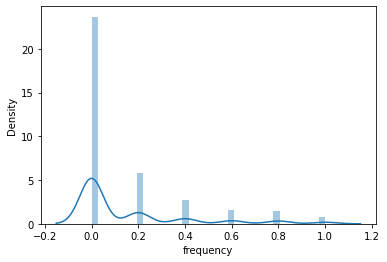

In [548]:
Frequency_Plot = scaled_df['frequency']
ax = sns.distplot(Frequency_Plot)

C:\Users\96279\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


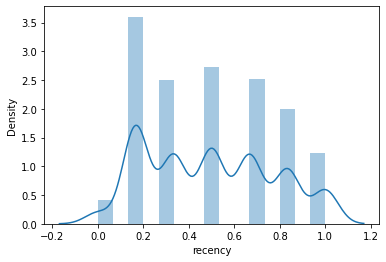

In [549]:
Recency_Plot = scaled_df['recency']
ax = sns.distplot(Recency_Plot)

C:\Users\96279\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


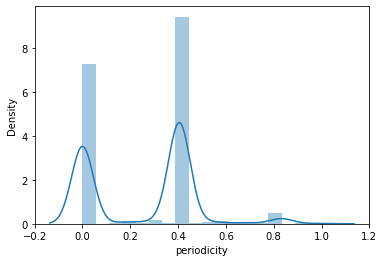

In [550]:
Periodicity_Plot = scaled_df['periodicity']
ax = sns.distplot(Periodicity_Plot)

## Use PCA to reduce features ##

In [551]:
pca = PCA()
pca.fit(scaled_df[['length' ,'frequency', 'recency', 'periodicity']])

PCA()

how many features we will keep?

In [552]:
pca.explained_variance_ratio_

#length and frequency are of highest importance

array([0.39632131, 0.36804635, 0.20875801, 0.02687433])

Text(0, 0.5, 'Cumulative explained Variance')

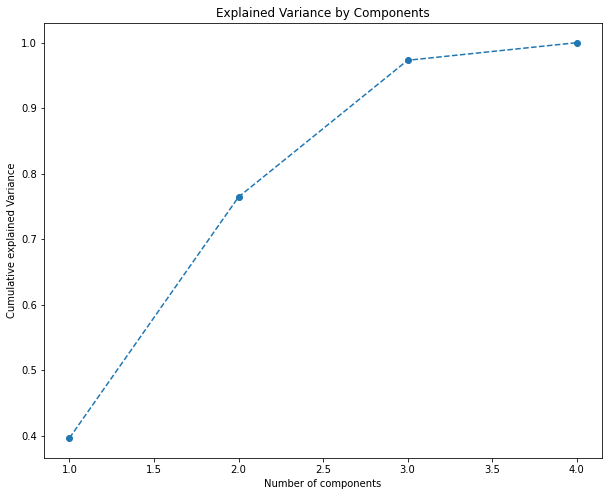

In [553]:
plt.figure(figsize = (10,8))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained Variance')

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, I decide to keep 2 components.

I will perform PCA with the chosen number of components (2)

In [554]:
pca = PCA(n_components=2)
pca.fit(scaled_df[['length' ,'frequency', 'recency', 'periodicity']])

PCA(n_components=2)

We need only the calculated resulting components scores for the elements in our data set:

In [555]:
pca.transform(scaled_df[['length' ,'frequency', 'recency', 'periodicity']])

array([[-0.0343088 ,  0.0446705 ],
       [-0.22658029, -0.139455  ],
       [-0.34628921,  0.15030996],
       ...,
       [ 0.43413025, -0.11394731],
       [ 0.43413025, -0.11394731],
       [ 0.39831741, -0.35105116]])

In [556]:
scores_pca = pca.transform(scaled_df[['length' ,'frequency', 'recency', 'periodicity']])

First, however, we must decide how many clustering solutions we’d test.
There is no general ruling on this issue. It really depends on the data. In our case, we test an algorithm with up to 20 clusters.


In [557]:
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

The next step involves plotting the WCSS against the number of components on a graph.

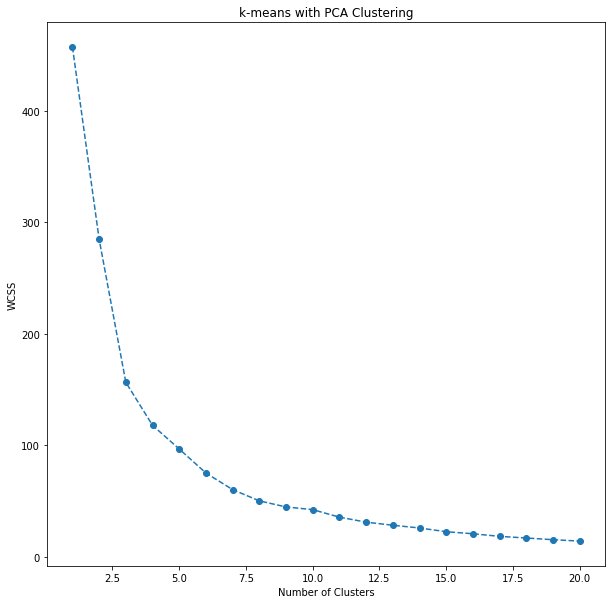

In [558]:
plt.figure(figsize=(10,10))
plt.plot(range(1, 21), wcss, marker = 'o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('k-means with PCA Clustering')
plt.show()

And from this graph, we determine the number of clusters we’d like to keep. To that effect, we use the Elbow-method. In this instance, the kink comes at the 3 or 4 clusters mark. So, we’ll be keeping a 3-cluster solution.

In [559]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [563]:
#create a new df with the original features and add the PCA scores and assigned clusters
df_segm_pca_kmeans = pd.concat([scaled_df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-2:] = ['Component 1', 'Component 2']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,uid,length,frequency,recency,periodicity,Component 1,Component 2,Segment K-means PCA
0,24,0.0,0.0,0.500,0.000,-0.034309,0.044670,0
1,59,0.0,0.0,0.667,0.405,-0.226580,-0.139455,0
2,212,0.0,0.0,0.833,0.000,-0.346289,0.150310,0
3,323,0.0,0.0,0.667,0.405,-0.226580,-0.139455,0
4,356,0.0,0.0,1.000,0.000,-0.502748,0.203288,0


In [564]:
#add names of the segments
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'First', 1:'second', 2: 'third'})
df_segm_pca_kmeans

,uid,length,frequency,recency,periodicity,Component 1,Component 2,Segment K-means PCA,Segment
0,24,0.0,0.0,0.500,0.000,-0.034309,0.044670,0,First
1,59,0.0,0.0,0.667,0.405,-0.226580,-0.139455,0,First
2,212,0.0,0.0,0.833,0.000,-0.346289,0.150310,0,First
3,323,0.0,0.0,0.667,0.405,-0.226580,-0.139455,0,First
4,356,0.0,0.0,1.000,0.000,-0.502748,0.203288,0,First
...,...,...,...,...,...,...,...,...,...
2972,28723,0.0,0.0,0.000,0.405,0.398317,-0.351051,1,second
2973,28725,0.0,0.0,0.000,0.405,0.398317,-0.351051,1,second
2974,28726,0.0,0.0,0.000,0.000,0.434130,-0.113947,1,second
2975,28729,0.0,0.0,0.000,0.000,0.434130,-0.113947,1,second


## Visualize Clusters ##
Will use PCA scores to find the most important components.

C:\Users\96279\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


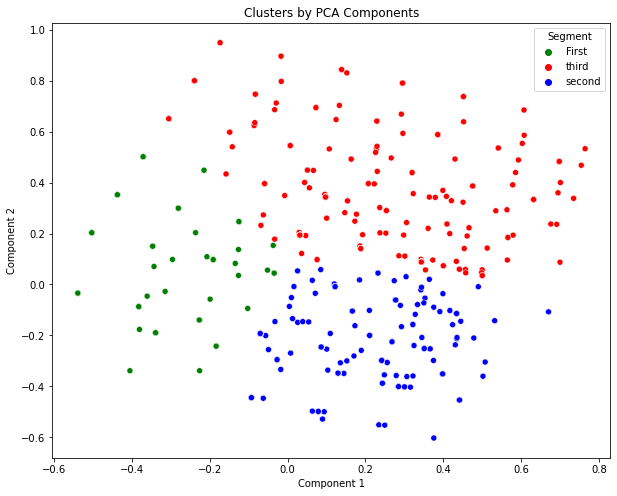

In [565]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g', 'r', 'b'])
plt.title('Clusters by PCA Components')
plt.show()

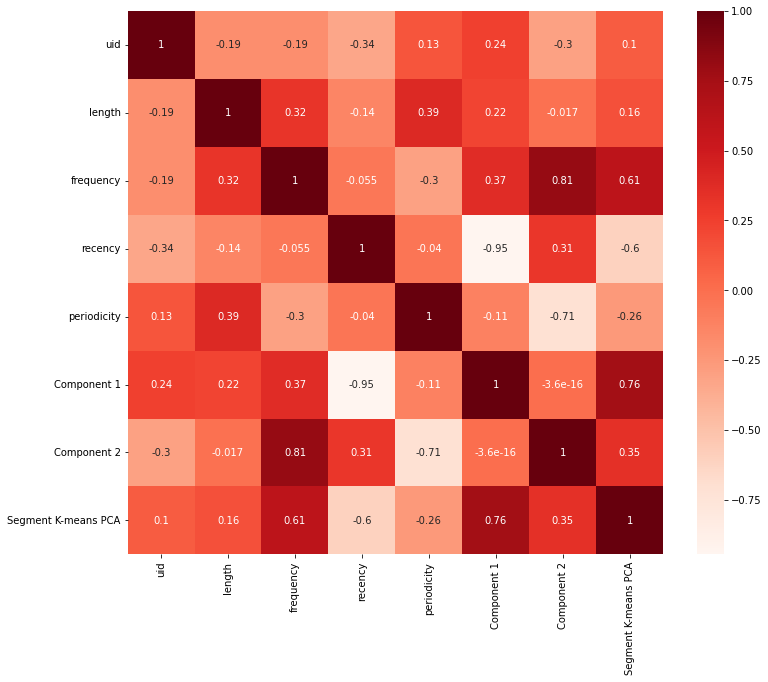

In [566]:
plt.figure(figsize=(12,10))
cor = df_segm_pca_kmeans.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

From the heatmap, I can recognize that the first component correlates positively length and frequency, meanwhile the second component correlates positvely with frequency and recency. Using this information, I can know what story the clusters tell.

We have 3 cluster.
First cluster: short term user.
second cluster: long term user but hasn't watched anything recently.
third cluster: super user, long time frequent and recent.